# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | santa cruz de tenerife
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | sinabang
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | warora
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | falenki
Processing Record 9 of Set 1 | ust-tsilma
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | nuriootpa
Processing Record 12 of Set 1 | cape canaveral
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | bargara
City not found. Skipping...
Processing Record 15 of Set 1 | yayladagi
Processing Record 16 of Set 1 | afaahiti
Processing Record 17 of Set 1 | griffith
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | luau
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | stanley
Processing Record 22 of 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,17.60,76,10,0.89,US,1692709150
1,santa cruz de tenerife,28.4682,-16.2546,33.78,32,0,6.17,ES,1692709308
2,port alfred,-33.5906,26.8910,25.66,28,48,3.13,ZA,1692709230
3,sinabang,2.4803,96.3801,27.15,79,21,2.28,ID,1692709272
4,adamstown,-25.0660,-130.1015,18.86,68,100,13.55,PN,1692709118


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,17.60,76,10,0.89,US,1692709150
1,santa cruz de tenerife,28.4682,-16.2546,33.78,32,0,6.17,ES,1692709308
2,port alfred,-33.5906,26.8910,25.66,28,48,3.13,ZA,1692709230
3,sinabang,2.4803,96.3801,27.15,79,21,2.28,ID,1692709272
4,adamstown,-25.0660,-130.1015,18.86,68,100,13.55,PN,1692709118


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

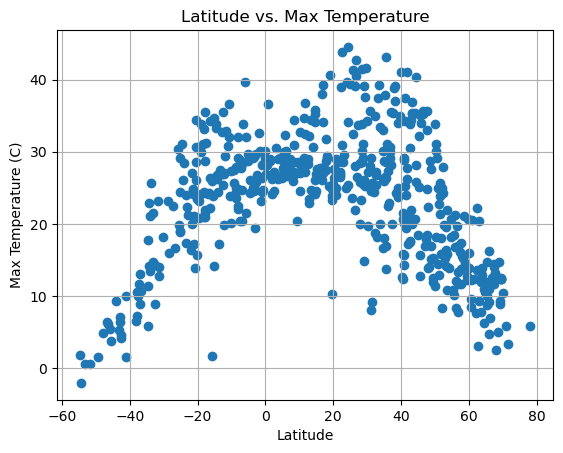

In [50]:
# Build scatter plot for latitude vs. temperature
fig_lat_temp, ax_lat_temp = plt.subplots()
ax_lat_temp.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

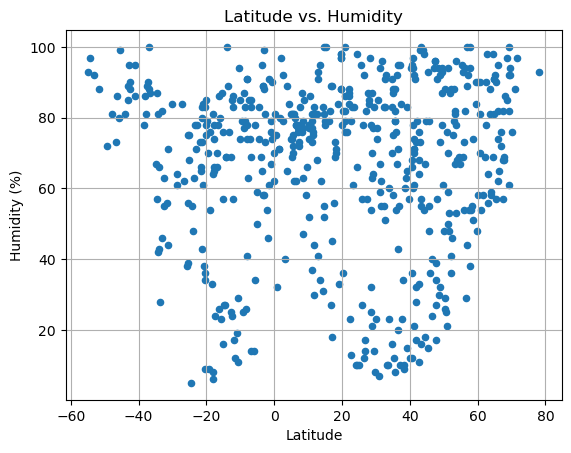

In [9]:
# Build the scatter plots for latitude vs. humidity
lat_humid = city_data_df.plot(
    kind="scatter", x="Lat", y="Humidity", title="Latitude vs. Humidity")

# Incorporate the other graph properties
lat_humid.set_xlabel("Latitude")
lat_humid.set_ylabel("Humidity (%)")
lat_humid.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

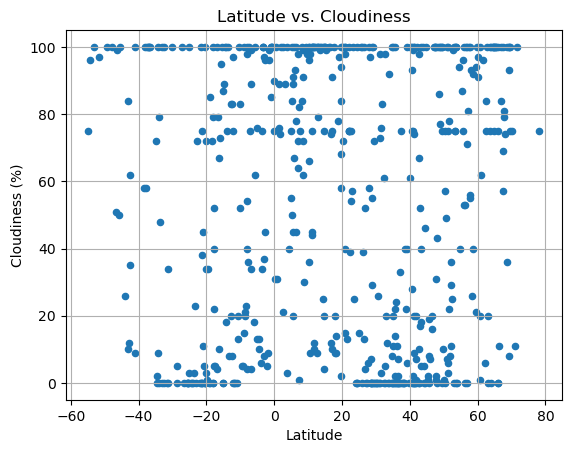

In [10]:
# Build the scatter plots for latitude vs. cloudiness
lat_cloud = city_data_df.plot(
    kind="scatter", x="Lat", y="Cloudiness", title="Latitude vs. Cloudiness")

# Incorporate the other graph properties
lat_cloud.set_xlabel("Latitude")
lat_cloud.set_ylabel("Cloudiness (%)")
lat_cloud.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

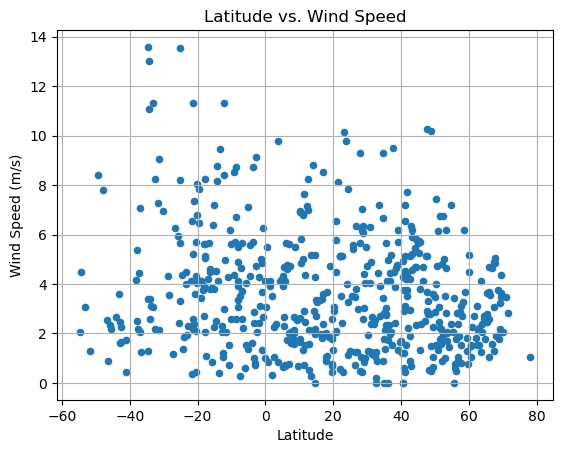

In [41]:
# Build the scatter plots for latitude vs. wind speed
lat_wind = city_data_df.plot(
    kind="scatter", x="Lat", y="Wind Speed", title="Latitude vs. Wind Speed")

# Incorporate the other graph properties
lat_wind.set_xlabel("Latitude")
lat_wind.set_ylabel("Wind Speed (m/s)")
lat_wind.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def linreg_plot(x_values, y_values):
    # Calculate linear regression for x- and y-values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values and equation
    regression_values = x_values * slope + intercept

    # Plot linear regression
    plt.plot(x_values, regression_values, color="red")
    plt.show()

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,17.60,76,10,0.89,US,1692709150
1,santa cruz de tenerife,28.4682,-16.2546,33.78,32,0,6.17,ES,1692709308
3,sinabang,2.4803,96.3801,27.15,79,21,2.28,ID,1692709272
5,warora,20.2333,79.0000,27.65,82,100,2.89,IN,1692709309
6,yellowknife,62.4560,-114.3525,13.56,90,75,1.54,CA,1692709273


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port alfred,-33.5906,26.8910,25.66,28,48,3.13,ZA,1692709230
4,adamstown,-25.0660,-130.1015,18.86,68,100,13.55,PN,1692709118
9,margaret river,-33.9500,115.0667,13.53,66,79,3.39,AU,1692709139
10,nuriootpa,-34.4833,139.0000,5.83,87,0,1.29,AU,1692709311
14,afaahiti,-17.7500,-149.2833,20.93,65,52,5.04,PF,1692709279


###  Temperature vs. Latitude Linear Regression Plot

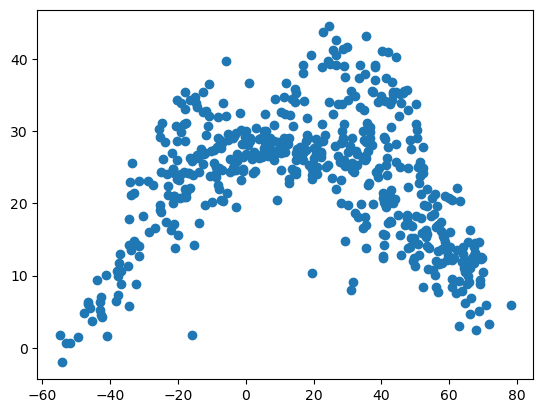

In [45]:
# Linear regression on Northern Hemisphere
fig
# linreg_plot(northern_hemi_df['Max Temp'], northern_hemi_df['Lat'])

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE